In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

,Timestamp,Value
0,2021-02-24 00:00:00,9212.88900
1,2021-02-24 00:00:15,9210.90605
2,2021-02-24 00:00:30,9208.92310
3,2021-02-24 00:00:45,9206.94015
4,2021-02-24 00:01:00,9204.95720
...,...,...
207355,2021-03-31 23:58:45,5931.60400
207356,2021-03-31 23:59:00,5931.60400
207357,2021-03-31 23:59:15,5931.60400
207358,2021-03-31 23:59:30,5931.60400


2074


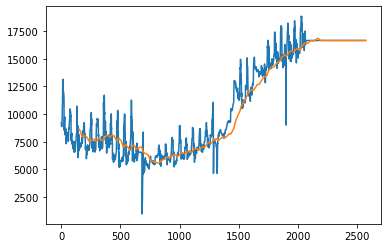

In [50]:
df = pd.read_csv("../data/consumer/conductivity_data.csv")

display(df)
values = df["Value"].values[::100]
print(len(values))
#values = np.ones(12000)

for i in range(1000, len(values)): #insert a trend into data
    values[i] += +(i-1000)*10
    
values = np.append(values, np.ones(500)*values[-1])
plt.plot(values)

values = np.convolve(values, np.ones(150)/150, mode='valid') #make moving average
plt.plot(range(150, 150+len(values)),values)
#plt.ylim([0, 15000])


#t = np.linspace(0, 10, 100)
#values = np.sin(t) + np.random.rand(100)*0.1

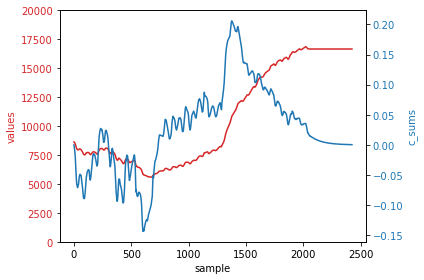

In [61]:
c_sum = 0
c_sums = [0]
decay = 0.01 #larger decay -> sum returns to neutral faster (good if we also want to detect trend shifts)

for i in range(1, len(values)):
    c_sum *=(1-decay)
    c_sum += (values[i] - values[i-1])/np.abs(values[i])
    c_sums.append(c_sum)
    
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('sample')
ax1.set_ylim([0, 20000])
ax1.set_ylabel('values', color=color)
ax1.plot(values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('c_sums', color=color) 
ax2.plot(c_sums, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()
